In [52]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('survey 605.csv')

In [37]:
data['How often do you track fitness data using wearable?'] = data[
    'How often do you track fitness data using wearable?'].replace(
{
    'Every day' : '5 or more times a week',
    'Once a week' : '1-2 times a week',
    'Every other day' : '3-4 times a week',
    'Once a month' : 'Less than once a week',
    'Rarely' : 'Less than once a week'
})

data['Has the fitness wearable helped you stay motivated to exercise?'] = data[
    'Has the fitness wearable helped you stay motivated to exercise?'].replace(
{
    'Strongly agree' : 5,
    'Agree' : 4,
    'Neutral' : 3,
    'Disagree' : 2,
    'Strongly disagree' : 1
})

data['How engaged do you feel with your fitness wearable?'] = data[
    'How engaged do you feel with your fitness wearable?'].replace(
{
    'Very engaged' : 5,
    'Somewhat engaged' : 4,
    'Neutral' : 3,
    'Not very engaged' : 2,
})

data['Has the fitness wearable helped you stay motivated to exercise?'] = data[
    'Has the fitness wearable helped you stay motivated to exercise?'].replace(
{
    'Strongly agree' : 5,
    'Agree' : 4,
    'Neutral' : 3,
    'Disagree' : 2,
    'Strongly disagree' : 1
})

data['Does using a fitness wearable make you feel more connected to the fitness community?'] = data[
    'Does using a fitness wearable make you feel more connected to the fitness community?'].replace(
{
    'Strongly agree' : 5,
    'Agree' : 4,
    'Neutral' : 3,
    'Disagree' : 2,
    'Strongly disagree' : 1
})

exer_freq = data['How often do you exercise in a week?'].value_counts()
usage_freq = data['How often do you track fitness data using wearable?'].value_counts()

print('Exercise freq')
print(exer_freq)
print('\n')
print('Usage freq')
print(usage_freq)

Exercise freq
3-4 times a week          9
1-2 times a week          8
Less than once a week     7
5 or more times a week    6
Name: How often do you exercise in a week?, dtype: int64


Usage freq
5 or more times a week    9
1-2 times a week          8
3-4 times a week          8
Less than once a week     5
Name: How often do you track fitness data using wearable?, dtype: int64


In [25]:
print(data['How engaged do you feel with your fitness wearable?'].value_counts())

Somewhat engaged    11
Very engaged        10
Neutral              7
Not very engaged     2
Name: How engaged do you feel with your fitness wearable?, dtype: int64


In [19]:
print(data['Do you think that the fitness wearable has made exercising more enjoyable?'].value_counts())

5    12
4    12
3     5
2     1
Name: Do you think that the fitness wearable has made exercising more enjoyable?, dtype: int64


In [39]:
usage = set()
for x in data['How often do you track fitness data using wearable?']:
    if x not in usage:
        usage.add(x)

{'Less than once a week', '1-2 times a week', '5 or more times a week', '3-4 times a week'}


In [40]:
usage_segment = {}
for x in usage:
    usage_segment[x] = data[data['How often do you track fitness data using wearable?'] == x]

In [35]:
counts1 = data['Has the fitness wearable helped you stay motivated to exercise?'].value_counts()
print(counts1)

5    16
4     8
3     5
1     1
Name: Has the fitness wearable helped you stay motivated to exercise?, dtype: int64


In [49]:
def motivation(x):
    all_motiv = round(np.average(data['Has the fitness wearable helped you stay motivated to exercise?']), 2)
    instance = usage_segment[x]
    instance_motiv = round(np.average(instance['Has the fitness wearable helped you stay motivated to exercise?']), 2)
    diff_motiv = round(instance_motiv - all_motiv, 2)
    return instance_motiv, diff_motiv

def enjoyable(x):
    all_enjoy = round(np.average(data['Do you think that the fitness wearable has made exercising more enjoyable?']), 2)
    instance = usage_segment[x]
    instance_enjoy = round(np.average(instance['Do you think that the fitness wearable has made exercising more enjoyable?']), 2)
    diff_enjoy = round(instance_enjoy - all_enjoy, 2)
    return instance_enjoy, diff_enjoy

def engaged(x):
    all_eng = round(np.average(data['How engaged do you feel with your fitness wearable?']), 2)
    instance = usage_segment[x]
    instance_eng = round(np.average(instance['How engaged do you feel with your fitness wearable?']), 2)
    diff_eng = round(instance_eng - all_eng, 2)
    return instance_eng, diff_eng

def connected(x):
    all_con = round(np.average(data['Does using a fitness wearable make you feel more connected to the fitness community?']), 2)
    instance = usage_segment[x]
    instance_con = round(np.average(instance['Does using a fitness wearable make you feel more connected to the fitness community?']), 2)
    diff_con = round(instance_con - all_con, 2)
    return instance_con, diff_con

In [51]:
print('Attribute differences from total_average')
cols = ['Usage', 'Motivating?', 'Enjoyable?', 'Engaging?', 'Affiliative?']
rows = []
for x in usage_segment:
    inst = []
    inst.append(x)
    inst.append(motivation(x)[1])
    inst.append(enjoyable(x)[1])
    inst.append(engaged(x)[1])
    inst.append(connected(x)[1])
    rows.append(inst)

rows[3], rows[2] = rows[2], rows[3]
#print(rows)
summ_df = pd.DataFrame(rows, columns=cols)
print(summ_df)

Attribute differences from total_average
                    Usage  Motivating?  Enjoyable?  Engaging?  Affiliative
0   Less than once a week        -0.07        0.03      -0.57         0.30
1        1-2 times a week        -0.52       -0.29      -0.35        -0.35
2        3-4 times a week        -0.15       -0.17       0.15        -0.22
3  5 or more times a week         0.62        0.39       0.47         0.34


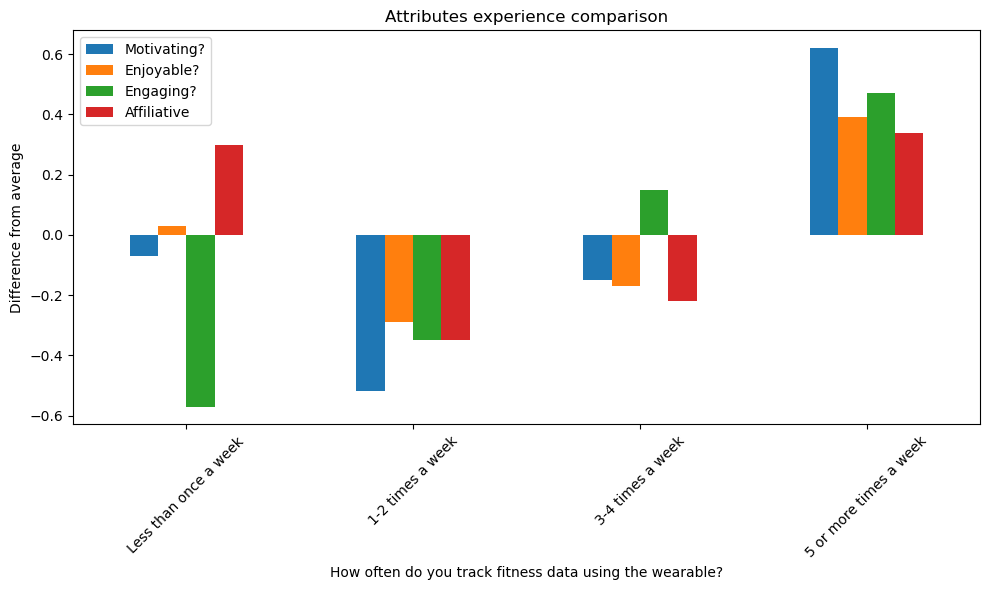

In [59]:
summ_df.set_index('Usage').plot(kind='bar', figsize=(10, 6))
plt.title('Attributes experience comparison')
plt.xlabel('How often do you track fitness data using the wearable?')
plt.ylabel('Difference from average')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
age_set = set()
for x in data['What is your age?']:
    if x not in age_set:
        age_set.add(x)

print(age_set)

{'25-34', 'Under 18', '45-54', '18-24', '55-64', '35-44'}


In [79]:
rows2 = []
for x in age_set:
    temp = []
    temp.append(x)
    sub = data[data['What is your age?'] == x]
    for y in usage:
        temp.append((sub['How often do you track fitness data using wearable?'] == y).sum())
    rows2.append(temp)
        
rows2[1], rows2[0] = rows2[0], rows2[1]
rows2[-1], rows2[-2] = rows2[-2], rows2[-1]
rows2[3], rows2[4] = rows2[4], rows2[3]
rows2[1], rows2[-2] = rows2[-2], rows2[1]
rows2[-2], rows2[2] = rows2[2], rows2[-2]

for x in rows2:
    x[4], x[3] = x[3], x[4]
    
columns2 = ['Age', 'Less than once a week', '1-2 times a week', '3-4 times a week', '5 or more times a week']

In [81]:
age_usage_df = pd.DataFrame(rows2, columns = columns2)
print(age_usage_df)

        Age  Less than once a week  1-2 times a week  3-4 times a week  \
0  Under 18                      0                 2                 2   
1     18-24                      2                 1                 2   
2     25-34                      1                 3                 1   
3     35-44                      1                 0                 1   
4     45-54                      1                 1                 1   
5     55-64                      0                 1                 1   

   5 or more times a week  
0                       1  
1                       5  
2                       1  
3                       2  
4                       0  
5                       0  


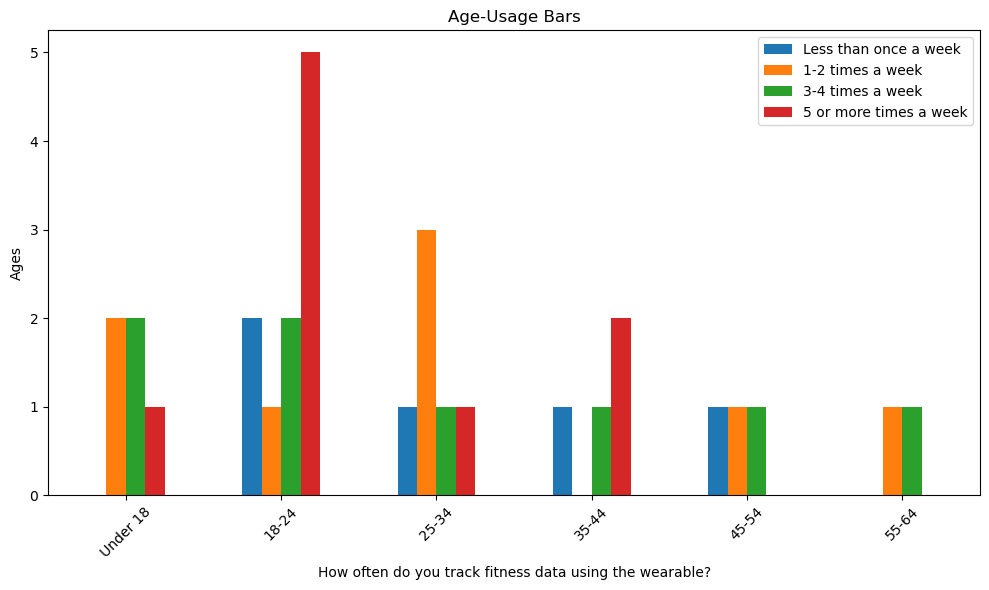

In [85]:
age_usage_df.set_index('Age').plot(kind='bar', figsize=(10, 6))
plt.title('Age-Usage Bars')
plt.xlabel('How often do you track fitness data using the wearable?')
plt.ylabel('Ages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()